In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat


### About the data:

The real estate markets, like those in Sydney and Melbourne, present an interesting opportunity for data analysts to analyze and predict where property prices are moving towards. Prediction of property prices is becoming increasingly important and beneficial. Property prices are a good indicator of both the overall market condition and the economic health of a country.

#### Columns:

- Date: Date when the house is ready for sale. 
- Price: Price of the house to be sold.
- Bedrooms: No. of bedrooms in the house.
- Bathrooms: No. of bathrooms in the house.
- Sqft_living: Squarefoot of Living in the house.
- Sqft_lot: Squarefoot of Floor in the house. 
- Floors: Floors on which living area located. 
- Waterfront: If waterfront available in front of house.
- View: Vie from the house.
- Condition: Condition of the house.
- Sqft_above: Squarefoot above is the space available at roof. 
- Sqft_basement: Squarefoot basement is the space available at the basement.
- Yr_built: In which year the house is built.
- Yr_renovated: Year of renovation.
- Street: On which street house is located.
- City: City in which the country is located.
- Statezip: Zip code of the area in which house is located.
- Country: Country is US.

**Task**: `Here the task is to predict the price of house(dependent variable) located in the
cities of US, with the help of other essential features (independent variable) available in
our dataset.`

### Regression

`Regression analysis consists of a set of machine learning methods that allow us to predict
a continuous outcome variable (Y) based on the value of one or multiple predictor variables 
(X).`

In [2]:
#importing basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**%matplotlib inline** : This is known as magic inline function.
When using the 'inline' backend, our matplotlib graphs will be included in our notebook, 
next to the code. 

Let's dive into our dataset.

In [3]:
data = pd.read_csv('../input/housedata/data.csv')

In [4]:
df = data.copy()
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


`Now firstly let's get a description about our dataset.`

In [5]:
df.shape

(4600, 18)

In [6]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [8]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Checking our model accuracy in the starting.

In [9]:
X = df.drop(["date",'street', 'city','statezip', 'country','price'], axis=1)
y = df[['price']]
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y= train_test_split(X,y, test_size=0.3, random_state=0)

from sklearn.linear_model import LinearRegression
mlrm = LinearRegression()

mlrm.fit(train_X,train_y)

mlrm.score(train_X, train_y)*100

39.11839148648859

Poor score, but what do we expect from raw data.

Let's start **Exploratory Data Analysis(EDA)**.

In [10]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


So, our price is majorly dependent upon bedrooms, bathrooms, sqft_living among these continuous variables.

In [11]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [12]:
df[df==0].count()

date                0
price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
street              0
city                0
statezip            0
country             0
dtype: int64

I've checked for NaN values first and then after go to check for the 0s in our dataset.

Many of you might think why should I checked for values equals to 0, because sometimes our data is fill with unconditional 0 values inspite of NaN values. So, it must be our habit to check for 0s also while cleaning our dataset.

Now, some of the columns like waterfront, view, sqft_above and sqft_basement seems more authentic to be 0s in their values because a house might not have waterfront or any view or basement area and might not be ever renovated.

But, it is really hard to digest a house with 0 bedrooms and 0 bathrooms, and impossible to have any house with 0 price, who'll sell a house for free.😂🤷‍♀️

Let's look into it with closer insights.

In [13]:
df[df["price"]==0].head(50)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4354,2014-05-05 00:00:00,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,WA 98001,USA
4356,2014-05-05 00:00:00,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,WA 98199,USA
4357,2014-05-05 00:00:00,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,WA 98146,USA
4358,2014-05-06 00:00:00,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,WA 98075,USA
4361,2014-05-07 00:00:00,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,1920,0,14901-14999 12th Ave SW,Burien,WA 98166,USA
4362,2014-05-07 00:00:00,0.0,4.0,4.00,3680,18804,2.0,0,0,3,3680,0,1990,2009,1223-1237 244th Ave NE,Sammamish,WA 98074,USA
4374,2014-05-09 00:00:00,0.0,2.0,2.50,2200,188200,1.0,0,3,3,2200,0,2007,0,39612 254th Ave SE,Enumclaw,WA 98022,USA
4376,2014-05-09 00:00:00,0.0,4.0,2.25,2170,10500,1.0,0,2,4,1270,900,1960,2001,216 SW 183rd St,Normandy Park,WA 98166,USA
4382,2014-05-12 00:00:00,0.0,5.0,4.50,4630,6324,2.0,0,0,3,3210,1420,2006,0,6925 Oakmont Ave SE,Snoqualmie,WA 98065,USA
4383,2014-05-13 00:00:00,0.0,5.0,4.00,4430,9000,2.0,0,0,3,4430,0,2013,1923,9235 NE 5th St,Bellevue,WA 98004,USA


Text(0.5, 1.0, 'Sqft_living for 0 price')

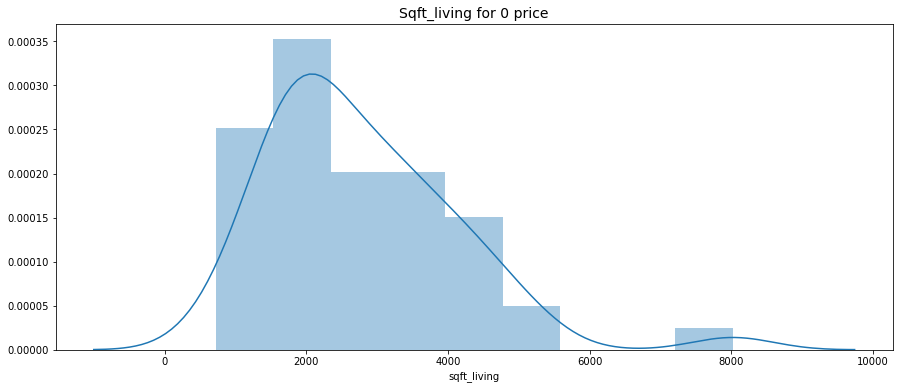

In [14]:
plt.figure(figsize=(15,6))
ax = sns.distplot(df[df["price"]==0].sqft_living)
ax.set_title('Sqft_living for 0 price', fontsize=14)

Majority of the 0 price house's sqft_living ranges between 1000-5000.

We have to check its correlation with other columns also.

In [15]:
df[df["price"]==0].agg([min, max, 'mean', 'median'])

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
min,2014-05-05 00:00:00,0.0,1.000000,1.00000,720.000000,3500.000000,1.0,0.000000,0.000000,2.000000,720.000000,0.000000,1920.000000,0.000000,101-127 247th Ave SE,Auburn,WA 98001,USA
max,2014-07-08 00:00:00,0.0,6.000000,6.25000,8020.000000,188200.000000,3.0,1.000000,4.000000,5.000000,8020.000000,1950.000000,2013.000000,2009.000000,9243 NE 20th St,Woodinville,WA 98199,USA
mean,NaN,0.0,3.979592,2.69898,2787.142857,16453.306122,1.5,0.061224,0.795918,3.673469,2295.714286,491.428571,1969.918367,812.714286,NaN,NaN,NaN,NaN
median,NaN,0.0,4.000000,2.50000,2600.000000,9000.000000,1.5,0.000000,0.000000,3.000000,1990.000000,0.000000,1962.000000,0.000000,NaN,NaN,NaN,NaN


So, 0 price houses have ~4 bedrooms, ~2.5 bathrooms and ~2800 sqft living.

As we discussed above these are some major columns on which price depends. So we'll use these to replace 0 prices of houses.

In [16]:
df1 = df[(df.bedrooms == 4) & (df.bathrooms > 1) & (df.bathrooms < 4) & (df.sqft_living > 2500) & 
         (df.sqft_living < 3000) & (df.floors < 3) & (df.yr_built < 1970)]

In [17]:
df1.shape

(79, 18)

In [18]:
df1.price.mean()

735475.0370705189

In [19]:
df['price'].replace(to_replace = 0, value = 735000, inplace = True)
len(df[(df['price'] == 0)])

0

And, it's done!!

Before moving forward let's quickly deal with 0 bedrooms and bathrooms.

Text(0.5, 1.0, 'Bedrooms VS Price')

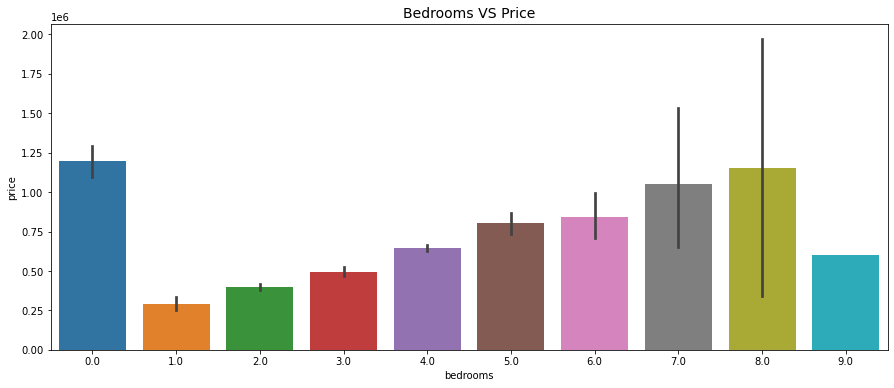

In [20]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['bedrooms'], y=df['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Bedrooms VS Price', fontsize=14)

Text(0.5, 1.0, 'Bedrooms VS Sqft_living')

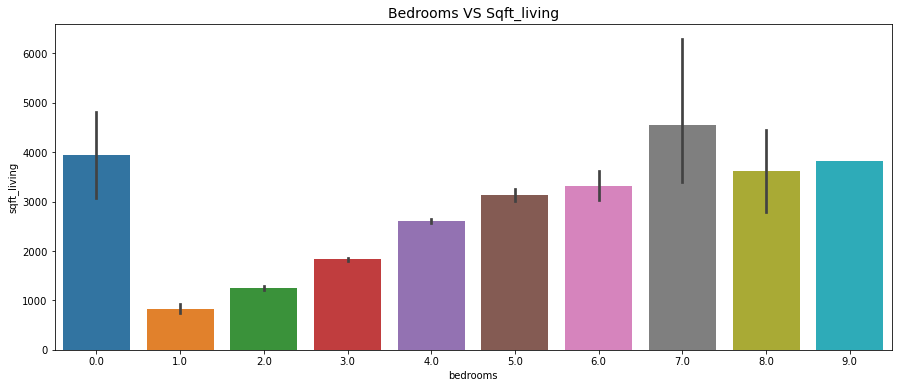

In [21]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['bedrooms'], y=df['sqft_living'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Bedrooms VS Sqft_living', fontsize=14)

As you can also observe sqft living and prices of 8 bedrooms closely related to each other so, let's replace 0 bedrooms with 8

In [22]:
df['bedrooms'].replace(to_replace = 0, value = 8, inplace = True)
len(df[(df['bedrooms'] == 0)])

0

Text(0.5, 1.0, 'Bathrooms VS Price')

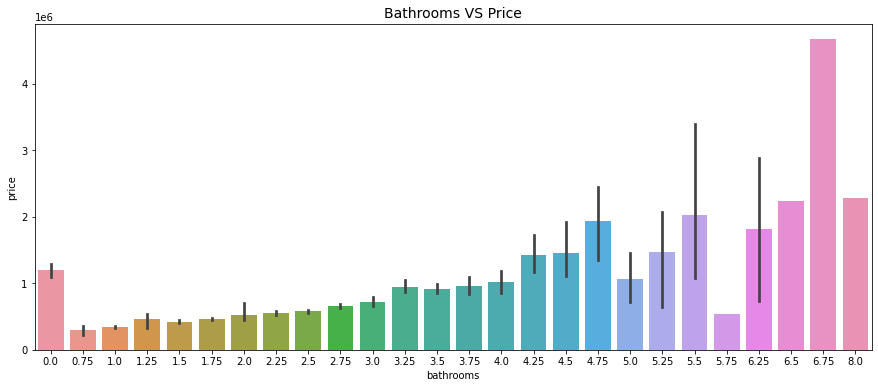

In [23]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['bathrooms'], y=df['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Bathrooms VS Price', fontsize=14)

Text(0.5, 1.0, 'Bathrooms VS Sqft_living')

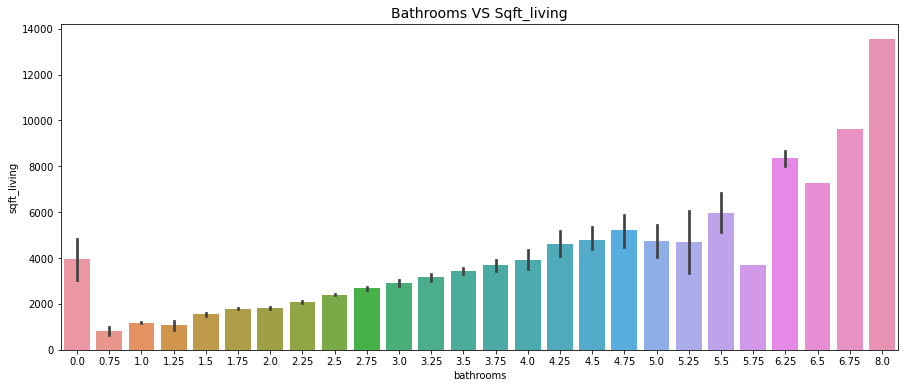

In [24]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['bathrooms'], y=df['sqft_living'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Bathrooms VS Sqft_living', fontsize=14)

As you can also observe sqft living and prices of 3.25 bathrooms closely related to each other so, let's replace 0 bathrooms with 3.25

In [25]:
df['bathrooms'].replace(to_replace = 0, value = 3.25, inplace = True)
len(df[(df['bathrooms'] == 0)])

0

Alright then, we've dealt with 0s let's move forward

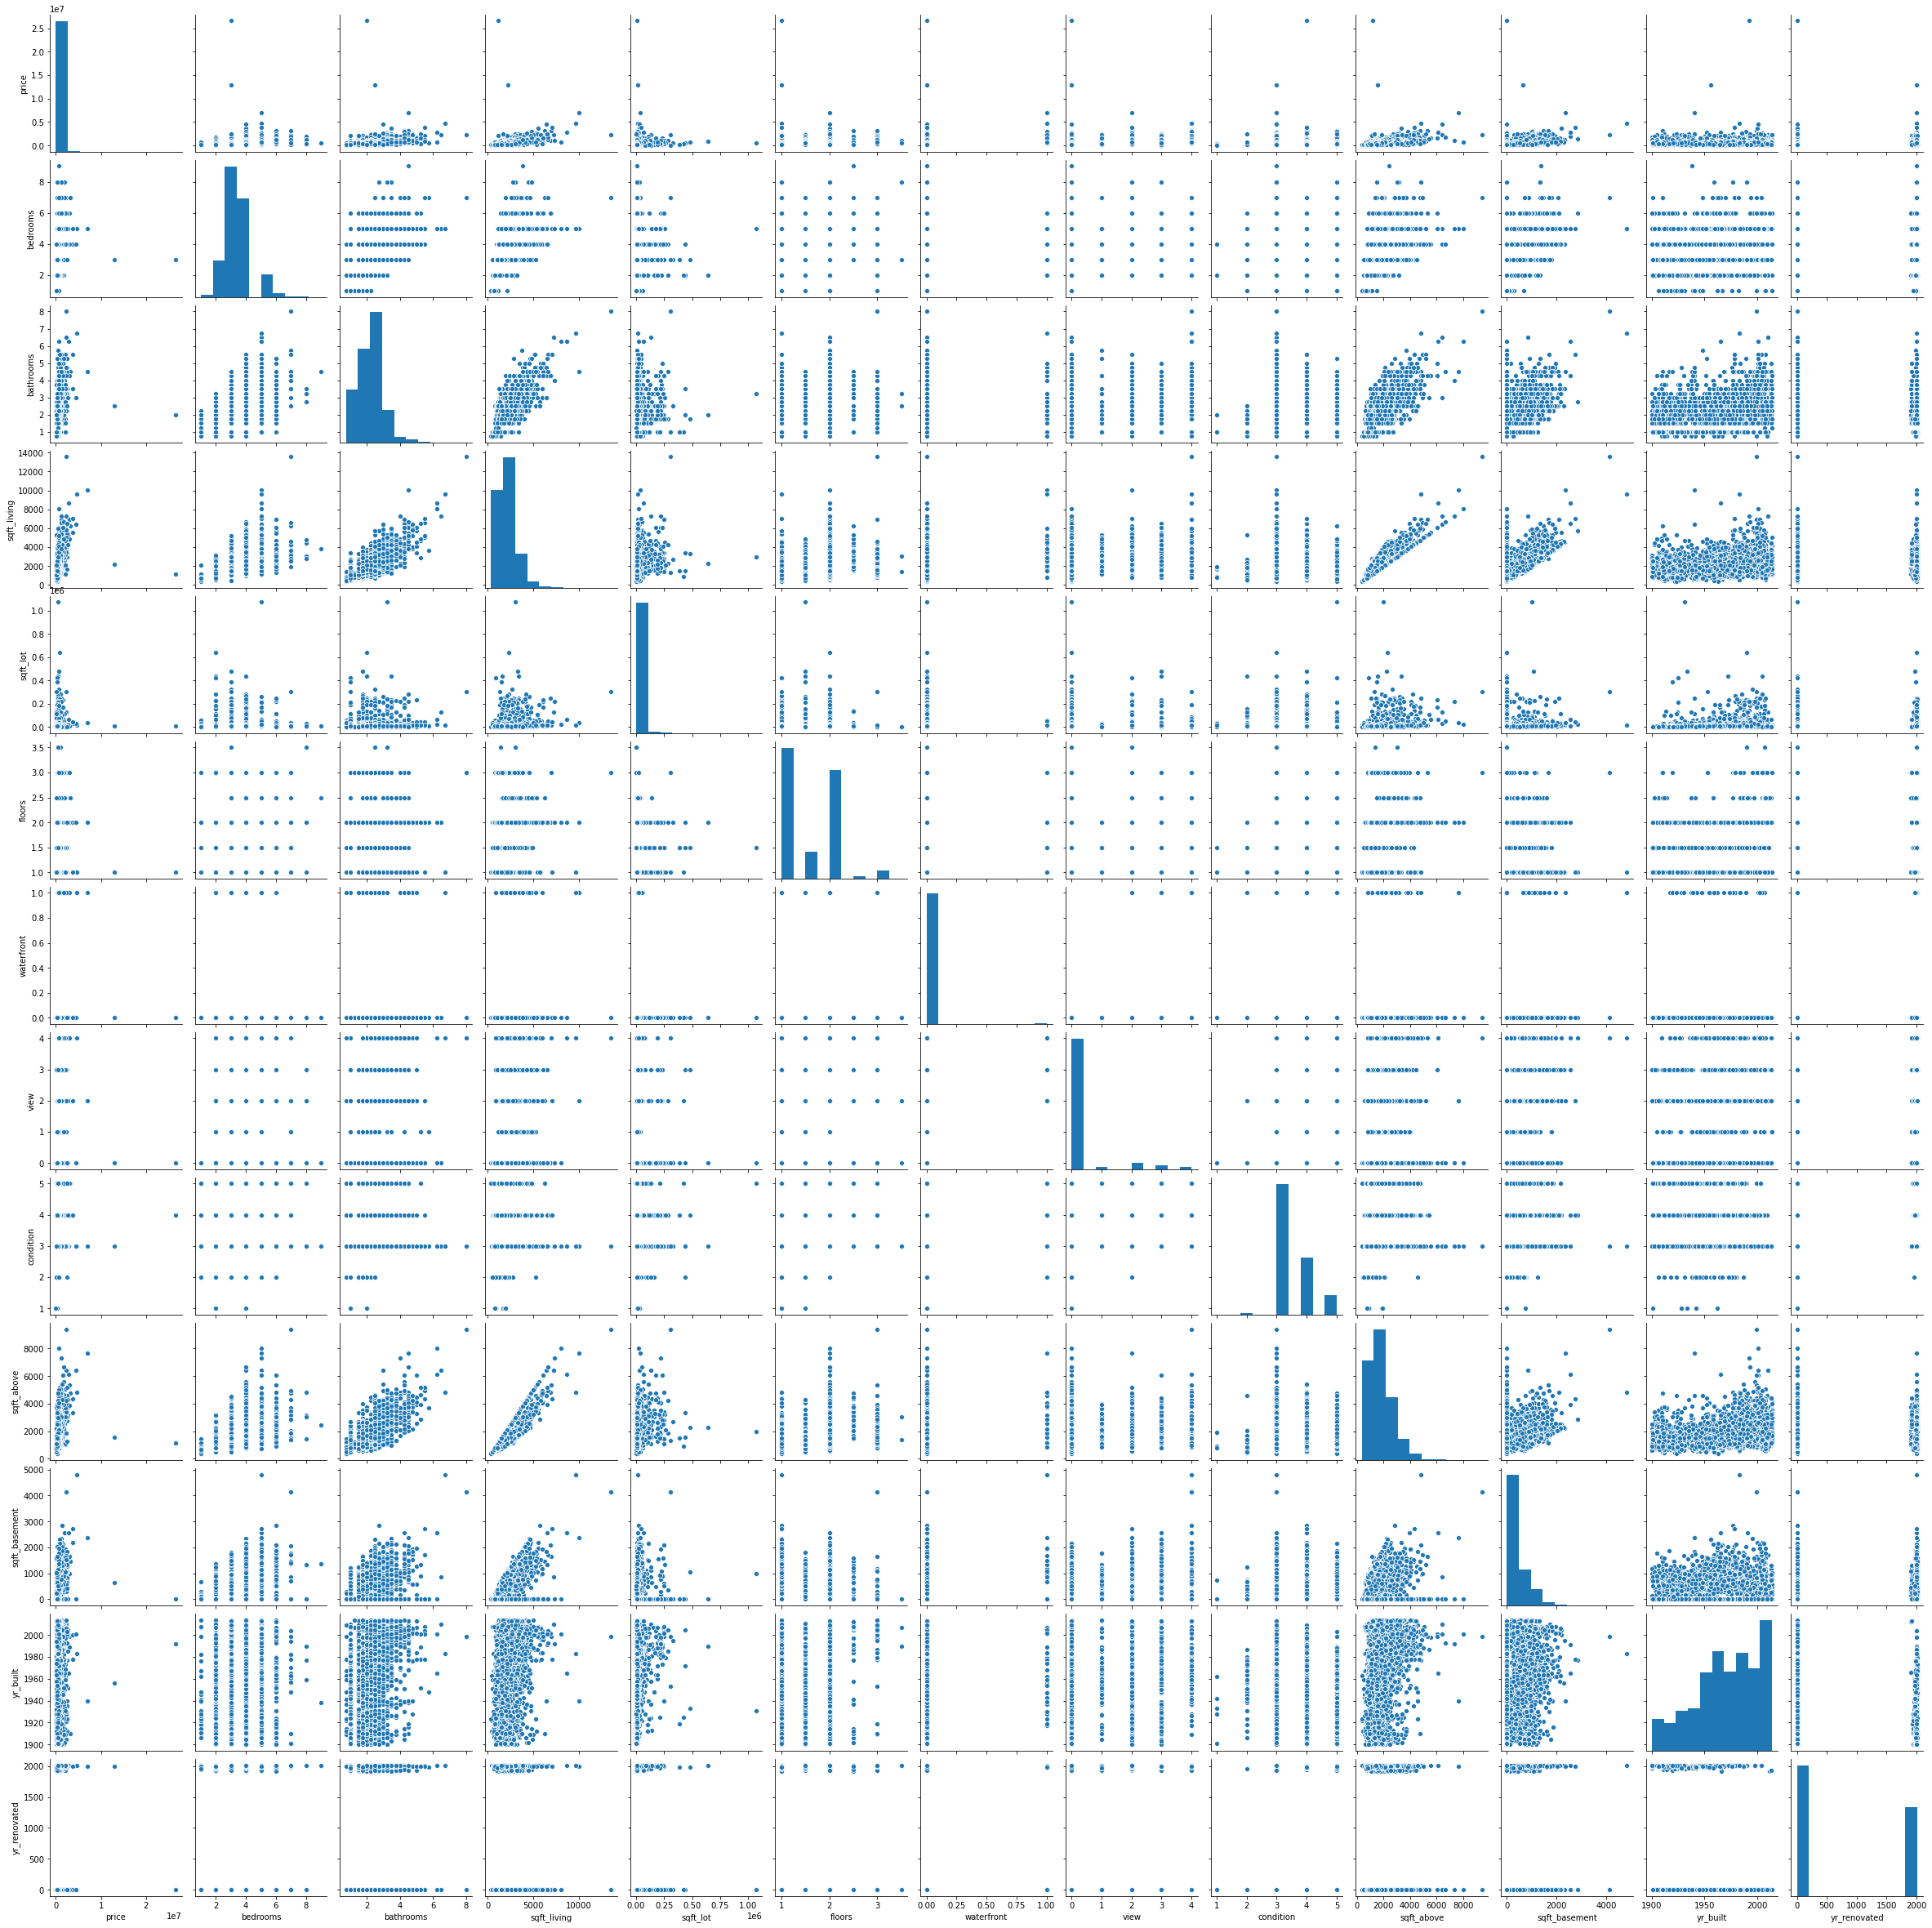

In [26]:
ax = sns.pairplot(df)

There are alot of outliers can clearly observed!!

Let's visualize it more clearly!

Text(0.5, 1.0, 'Distplot of Price')

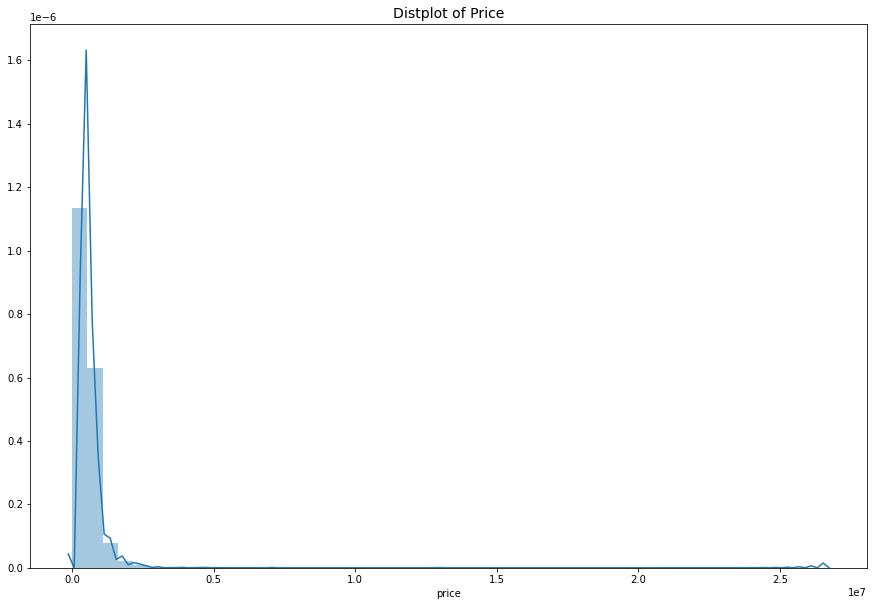

In [27]:
plt.figure(figsize=(15,10))
ax = sns.distplot(df['price'], kde=True)
ax.set_title('Distplot of Price', fontsize=14)

Highly negative skewed!! Can be treated by eleminating or replacing outliers.

**Outliers**: Outliers are extreme values that deviate from other observations on data , they may indicate a variability in a measurement, experimental errors or a novelty. In other words, an outlier is an observation that diverges from an overall pattern on a sample.

**How to detect them**:
- Scatter plot
- Box plot
- Z score

**Treatment**:
- Z Score
- IQR
- Eleminating
- Central Tendency Capping.

**Z Score**: 
The z-score or standard score of an observation is a metric that indicates how many standard deviations a data point is from the sample’s mean, assuming a gaussian distribution. This makes z-score a parametric method. Very frequently data points are not to described by a gaussian distribution, this problem can be solved by applying transformations to data ie: scaling it.

In [28]:
from scipy import stats
df['price'] = df['price'].replace([data['price'][np.abs(stats.zscore(data['price'])) > 3]],np.median(df['price']))

Handling outliers of price columns. As, it is very important because at last we're predicting price and disturbance in its distribution might hit hard to our predictions.

Text(0.5, 1.0, 'Distplot of Price')

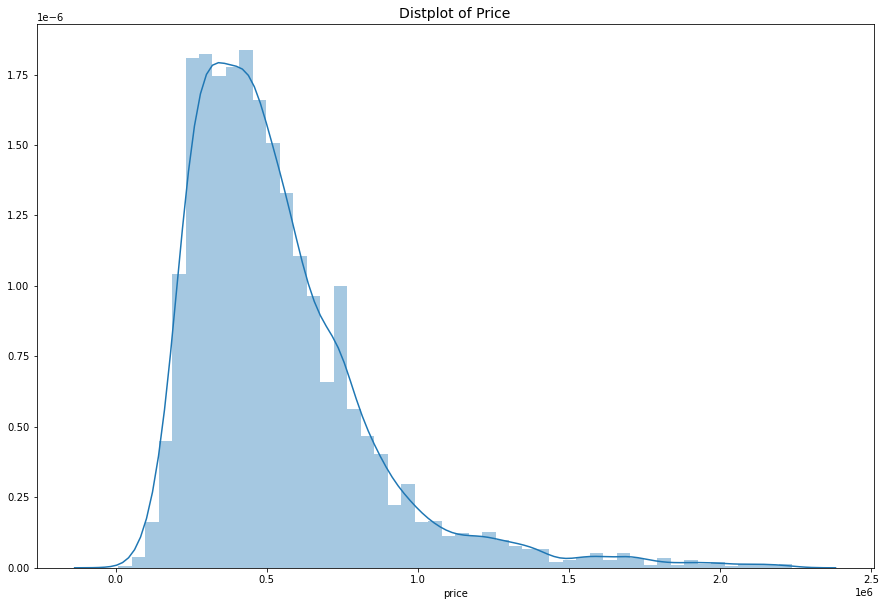

In [29]:
plt.figure(figsize=(15,10))
ax = sns.distplot(df['price'], kde=True)
ax.set_title('Distplot of Price', fontsize=14)

What a CHANGE!!
Quickly Visualizing more columns.

Text(0.5, 1.0, 'Sqft_living VS Price')

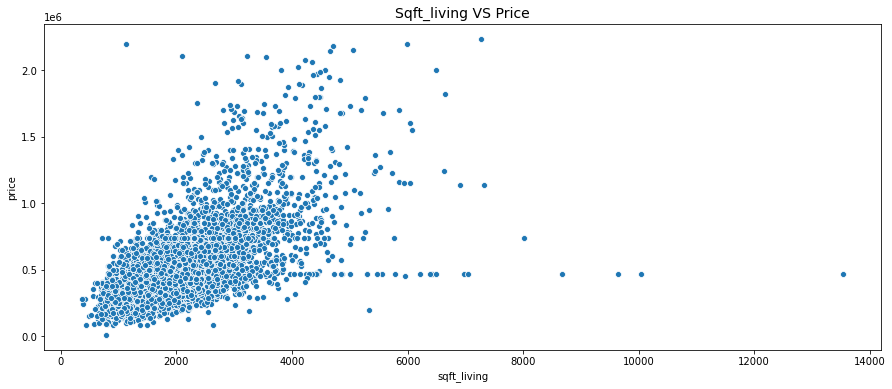

In [30]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(data=df, x="sqft_living", y="price")
ax.set_title('Sqft_living VS Price', fontsize=14)

As we can observe that many of the data is less than 6000. So, let's handle this uneven data.

Removing outliers of Sqft_living using different approach.

In [31]:
df['sqft_living'] = np.where((df.sqft_living >6000 ), 6000, df.sqft_living)

Text(0.5, 1.0, 'Sqft_living VS Price')

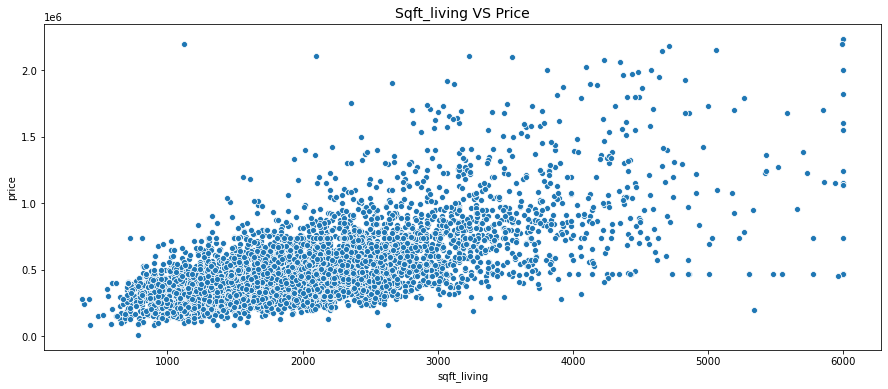

In [32]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(data=df, x="sqft_living", y="price")
ax.set_title('Sqft_living VS Price', fontsize=14)

Similarly, doing with rest of the continuous columns.

Text(0.5, 1.0, 'Sqft_lot VS Price')

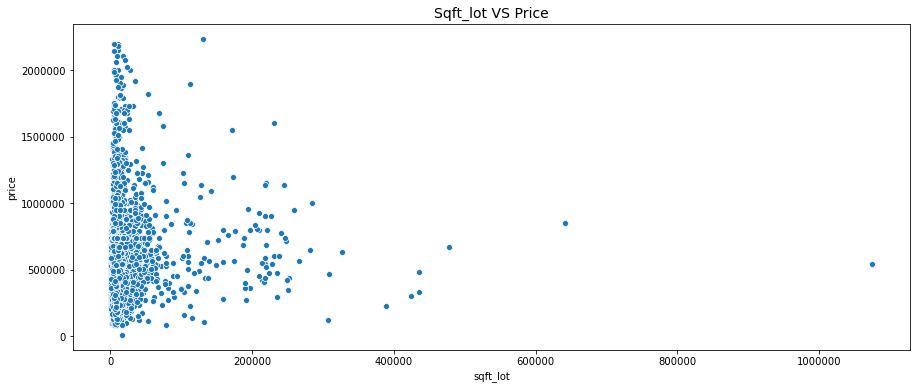

In [33]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(data=df, x="sqft_lot", y="price")
ax.ticklabel_format(style='plain')
ax.set_title('Sqft_lot VS Price', fontsize=14)

Too much disturbance in this column and also as we checked above is not much correlated to our dependent column price. So, I've decided to leave it as it is.

Text(0.5, 1.0, 'Sqft_above VS Price')

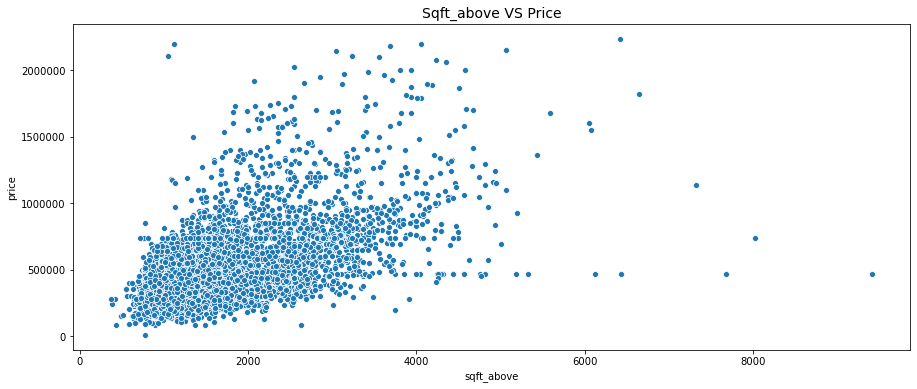

In [34]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(data=df, x="sqft_above", y="price")
ax.ticklabel_format(style='plain')
ax.set_title('Sqft_above VS Price', fontsize=14)

In [35]:
df['sqft_above'] = np.where((df.sqft_above >5000 ), 5000, df.sqft_above)

Text(0.5, 1.0, 'Sqft_basement VS Price')

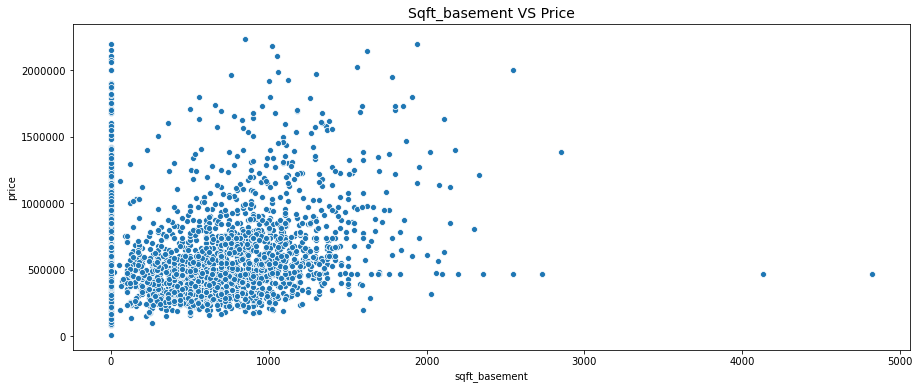

In [36]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(data=df, x="sqft_basement", y="price")
ax.ticklabel_format(style='plain')
ax.set_title('Sqft_basement VS Price', fontsize=14)

Alot of 0's in sqft_basement but not an outliers because houses might have without basements.

**Note**: `not all extreme points can be treated as outlier. May they are really an authentic data.`

Still, let's make extreme large values near 2000.

In [37]:
df['sqft_basement'] = np.where((df.sqft_basement >2000 ), 2000, df.sqft_basement)

Let's catch up with discrete variables.

Text(0.5, 1.0, 'Bedrooms VS Price')

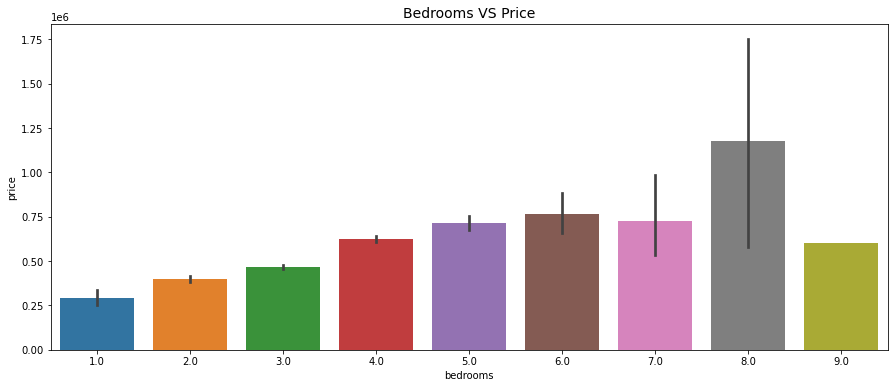

In [38]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['bedrooms'], y=df['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Bedrooms VS Price', fontsize=14)

In [39]:
df['bedrooms'].nunique()

9

In [40]:
bedroom = df.groupby(['bedrooms']).price.agg([len, min, max])
bedroom

,len,min,max
bedrooms,,,
1.0,38.0,80000.0,735000.0
2.0,566.0,7800.0,1695000.0
3.0,2032.0,83300.0,2147500.0
4.0,1531.0,84350.0,2199900.0
5.0,353.0,185000.0,2238888.0
6.0,61.0,175000.0,2180000.0
7.0,14.0,280000.0,1950000.0
8.0,4.0,340000.0,1970000.0
9.0,1.0,599999.0,599999.0


Max price of 7,8,9 bedrooms are less than that of 6 bedrooms which is kind strange, but it might possible if the house is far from the main town or have some issues like paranormal activities like hollywood movies😂😂!!

We can leave it as it ease or we can change it also!! I personally think let's deal with it because less than 20 rows have more than 6 bedrooms and it will might lead to disturbance in our distribution.

In [41]:
df['bedrooms'] = np.where((df.bedrooms >6 ), 6, df.bedrooms)

Text(0.5, 1.0, 'Bathrooms VS Price')

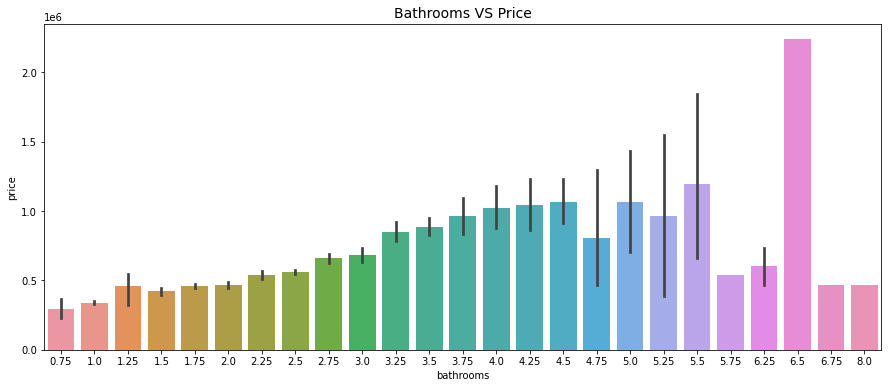

In [42]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['bathrooms'], y=df['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Bathrooms VS Price', fontsize=14)

In [43]:
df['bathrooms'].nunique()

25

See, personally I don't have idea about 1.25, 1.75 kind of bethrooms but it doesn't seems an error because we have alot more entries like that.

In [44]:
df['bathrooms'] = np.where((df.bathrooms == 0.75), 1, df.bathrooms)
df['bathrooms'] = np.where((df.bathrooms == 1.25 ), 1, df.bathrooms)
df['bathrooms'] = np.where((df.bathrooms > 4.75 ), 5, df.bathrooms)

I here replaced few of less occuring entries to decrease the skewness of our distribution.

Text(0.5, 1.0, 'Floors VS Price')

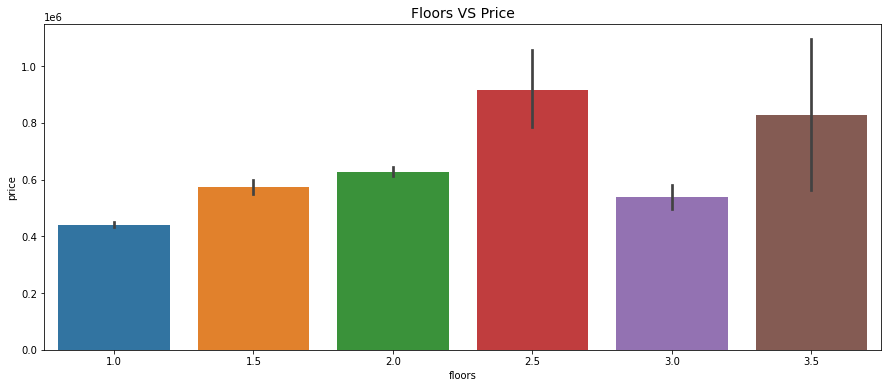

In [45]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['floors'], y=df['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Floors VS Price', fontsize=14)

Maximum price is for 2.5 floors trailing by 3.5 floors.

In [46]:
floor = df.groupby(['floors']).price.agg([len , min, max])
floor

,len,min,max
floors,,,
1.0,2174.0,7800.0,2199900.0
1.5,444.0,132500.0,2027000.0
2.0,1811.0,84350.0,2238888.0
2.5,41.0,195000.0,1990000.0
3.0,128.0,288790.0,2000000.0
3.5,2.0,563500.0,1095000.0


Only two houses have 3.5 floors. Handling this by replacing it with 3.0 floors.

In [47]:
df['floors'] = np.where((df.floors == 3.5 ), 3, df.floors)

Text(0.5, 1.0, 'Waterfront VS Price')

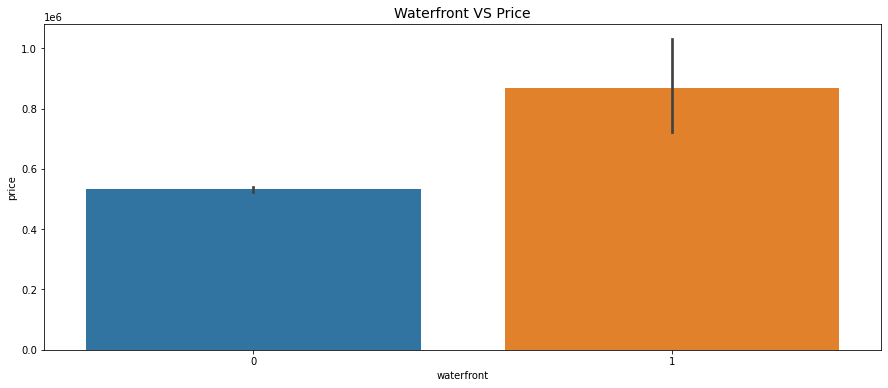

In [48]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['waterfront'], y=df['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Waterfront VS Price', fontsize=14)

In [49]:
waterfront = df.groupby(['waterfront']).price.agg([len , min, max])
waterfront

,len,min,max
waterfront,,,
0,4567.0,7800.0,2238888.0
1,33.0,385000.0,2200000.0


Clearly, houses with waterfront starts only with ~0.4million. No, changes for me in this column.

Text(0.5, 1.0, 'View VS Price')

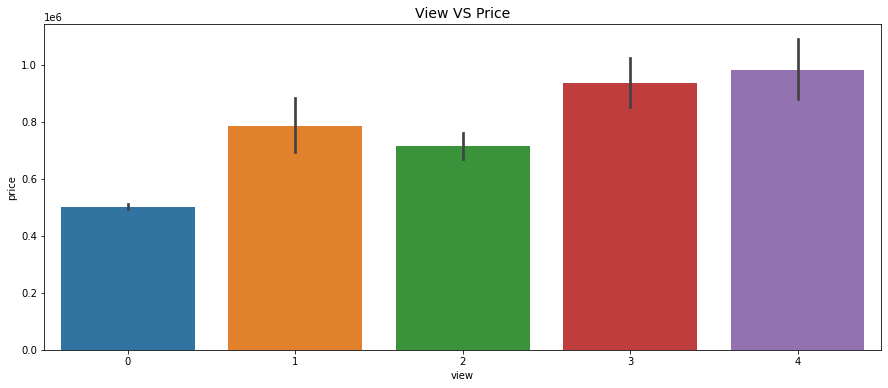

In [50]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['view'], y=df['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('View VS Price', fontsize=14)

In [51]:
view = df.groupby(['view']).price.agg([len , min, max])
view

,len,min,max
view,,,
0,4140.0,7800.000000,2238888.0
1,69.0,180785.714286,1965221.0
2,205.0,175000.000000,1925000.0
3,116.0,107500.000000,2180000.0
4,70.0,361000.000000,2200000.0


Well no need for any changes. 0 view is for houses having no sea facing view or anything like that. So it seems pretty authentic to me.

Text(0.5, 1.0, 'Condition VS Price')

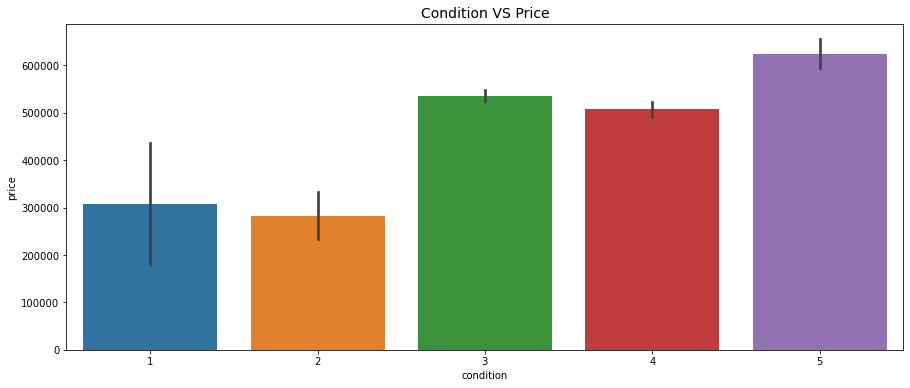

In [52]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['condition'], y=df['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Condition VS Price', fontsize=14)

In [53]:
condition = df.groupby(['condition']).price.agg([len , min, max])
condition

,len,min,max
condition,,,
1,6.0,7800.0,550000.0
2,32.0,80000.0,735000.0
3,2875.0,83000.0,2238888.0
4,1252.0,83300.0,2110000.0
5,435.0,83300.0,2147500.0


Possibly the condition here is for the condition of house and I assuming 5 as best condition and 1 as the worst.

But 1 has just 6 houses that means USA is a country of good conditioned houses.

Well just one change for me to replace 1 with 2. That's all.

In [54]:
df['condition'] = np.where((df.condition == 1 ), 2, df.condition)

Done with the Discrete columns here. Yr_built & yr_renovated are out of two least correlated columns with price. Thus, decided to leave them as it is.

Let's quickly check prediction with these continuous columns only except sqft_lot, yr_built and yr_renovated.

In [55]:
X = df.drop(["date",'street', 'city','statezip','sqft_lot','country','price','yr_built','yr_renovated'], axis=1)
y = df[['price']]
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y= train_test_split(X,y, test_size=0.3, random_state=0)

from sklearn.linear_model import LinearRegression
mlrm = LinearRegression()

mlrm.fit(train_X,train_y)

mlrm.score(train_X, train_y)*100

47.15255777287092

Increased!!...

Time to drop few columns from our dataframe.

In [56]:
df.drop(["date",'yr_built','yr_renovated','sqft_lot'], axis=1, inplace = True)

Checking for multicollinearity among the continuous columns using VIF methods.

**Multicollinearity**: Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model.

**Why not Multicollinearity?**: Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable.

**Detection of Multicollinearity**: Multicollinearity can be detected via various methods. One of the popular method is using VIF.

**VIF**: VIF stands for Variable Inflation Factors. VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.

`Here, I'll check VIF only for the continuous variables.`

In [57]:
X1 = df.drop(['street', 'city','statezip','country'], axis=1)

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_vif = add_constant(X1)

pd.Series([variance_inflation_factor(X_vif.values, i) 
               for i in range(X_vif.shape[1])], 
              index=X_vif.columns)

const             56.175778
price              1.846754
bedrooms           1.705436
bathrooms          2.917279
sqft_living      309.129626
floors             1.835056
waterfront         1.163495
view               1.370758
condition          1.144671
sqft_above       253.258734
sqft_basement     72.923621
dtype: float64

Now, VIF of sqft_living & sqft_above is very very high. That means we have to drop any two of the columns because it's not at all good for our model. 

But Wait! How will we decide which of the columns should be dropped?

Here comes the role of Significancy.

**Significancy**: In statistics, statistical significance means that the result that was produced has a reason behind it, it was not produced randomly, or by chance.

Here, we are currently focusing on continuous data. So best statistical test according to this condition will be: Correlation Coefficients

**Correlation Coefficients**: Correlation coefficients are used to measure how strong a relationship is between two variables.

In [59]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,sqft_basement
price,1.000000,0.341302,0.500659,0.642631,0.273634,0.094394,0.332733,0.057148,0.554204,0.277703
bedrooms,0.341302,1.000000,0.542726,0.611202,0.185383,-0.003367,0.112395,0.023077,0.498072,0.327940
bathrooms,0.500659,0.542726,1.000000,0.761654,0.495566,0.072746,0.209390,-0.124408,0.689902,0.280657
sqft_living,0.642631,0.611202,0.761654,1.000000,0.351501,0.101622,0.304232,-0.064241,0.873417,0.423832
floors,0.273634,0.185383,0.495566,0.351501,1.000000,0.022087,0.030857,-0.278188,0.531165,-0.262870
waterfront,0.094394,-0.003367,0.072746,0.101622,0.022087,1.000000,0.360935,0.000190,0.073467,0.082271
view,0.332733,0.112395,0.209390,0.304232,0.030857,0.360935,1.000000,0.062832,0.170420,0.310763
condition,0.057148,0.023077,-0.124408,-0.064241,-0.278188,0.000190,0.062832,1.000000,-0.182337,0.207176
sqft_above,0.554204,0.498072,0.689902,0.873417,0.531165,0.073467,0.170420,-0.182337,1.000000,-0.067101
sqft_basement,0.277703,0.327940,0.280657,0.423832,-0.262870,0.082271,0.310763,0.207176,-0.067101,1.000000


Text(0.5, 1.0, 'CORRELATION MATRIX')

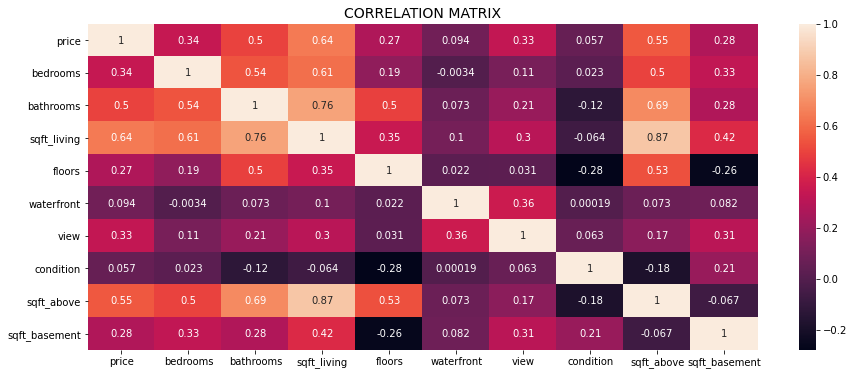

In [60]:
plt.figure(figsize=(15,6))
ax = sns.heatmap(df.corr(),annot = True)
ax.set_title('CORRELATION MATRIX', fontsize=14)

Sqft_living and sqft_above are highly correlated but Sqft_abobe is less correlated with price. So we got our column which can be dropped.

In [61]:
X_vif = X_vif.drop(['sqft_above'],axis = 1)
pd.Series([variance_inflation_factor(X_vif.values, i) 
               for i in range(X_vif.shape[1])], 
              index=X_vif.columns)

const            56.145232
price             1.828987
bedrooms          1.705024
bathrooms         2.916336
sqft_living       3.840877
floors            1.822707
waterfront        1.155530
view              1.370443
condition         1.144582
sqft_basement     1.738143
dtype: float64

Perfect👌!!

Now, as you all can notice in heatmap. Columns like condition and waterfront have less impressive correlation with our dependent variable. So that I've decided to drop them as well.

In [62]:
df.drop(['waterfront','condition','sqft_above'],axis=1, inplace=True)

In [63]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,view,sqft_basement,street,city,statezip,country
0,313000.0,3.0,1.50,1340,1.5,0,0,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,468750.0,5.0,2.50,3650,2.0,4,280,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3.0,2.00,1930,1.0,0,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3.0,2.25,2000,1.0,0,1000,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4.0,2.50,1940,1.0,0,800,9105 170th Ave NE,Redmond,WA 98052,USA


In [64]:
df.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
floors           float64
view               int64
sqft_basement      int64
street            object
city              object
statezip          object
country           object
dtype: object

Here is the end of EDA with continuous terms.

Left with object types to handle. Let's start with country.

In [65]:
df['country'].nunique()

1

All the entries have common country, will never affect our dependent variable. Will drop it later.

In [66]:
df['street'].nunique()

4525

Too many unique values for 4600 entries, again will never affect our dependent variable. Will drop it later.

Just left with city and statezip. Here we all know satezip and city are quite relateable things. Like every city has a unique zip code. So, we have to choose wisely one out of these two columns.

In [67]:
df['city'].nunique()

44

In [68]:
df['statezip'].nunique()

77

As we can observe, city has 44 unique values and statezip has 77. Let's see which variable has more impact to price.

In [69]:
city = df.groupby(['city']).price.agg([len, min, max])
pd.set_option('display.max_rows',70)
city

,len,min,max
city,,,
Algona,5.0,100000.000000,262000.0
Auburn,176.0,87500.000000,900000.0
Beaux Arts Village,1.0,745000.000000,745000.0
Bellevue,286.0,248000.000000,2150000.0
Black Diamond,9.0,224000.000000,735000.0
Bothell,33.0,347000.000000,749995.0
Burien,74.0,100000.000000,1035000.0
Carnation,22.0,80000.000000,1680000.0
Clyde Hill,11.0,468750.000000,1388000.0


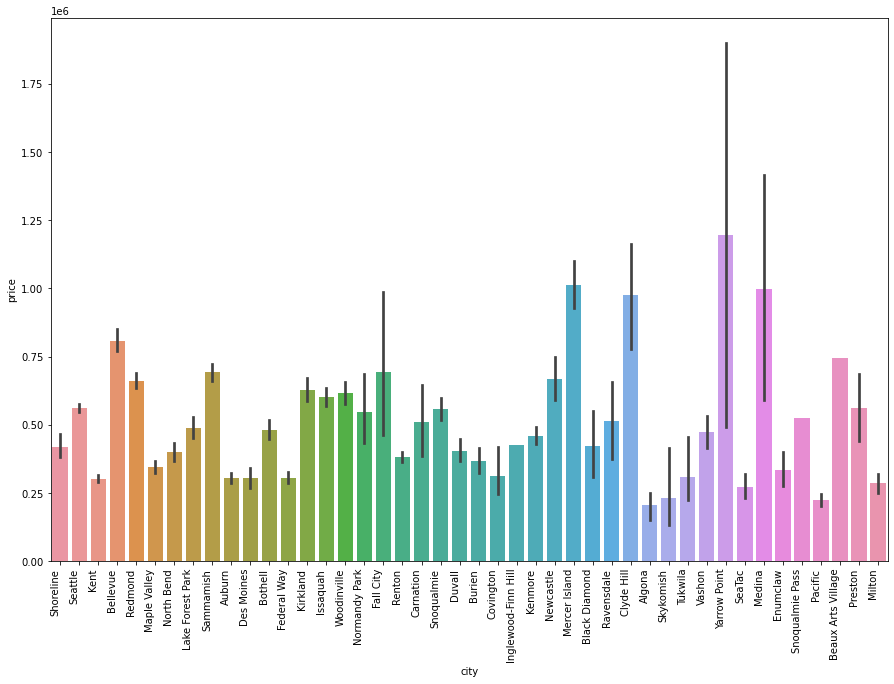

In [70]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="city", y="price", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right");

In [71]:
statezip = df.groupby(['statezip']).price.agg([len, min, max])
pd.set_option('display.max_rows',70)
statezip

,len,min,max
statezip,,,
WA 98001,67.0,100000.000000,735000.0
WA 98002,36.0,87500.000000,735000.0
WA 98003,48.0,156000.000000,819000.0
WA 98004,74.0,84350.000000,2150000.0
WA 98005,29.0,497333.333333,1900000.0
...,...,...,...
WA 98188,23.0,110700.000000,735000.0
WA 98198,56.0,140000.000000,950000.0
WA 98199,68.0,193000.000000,1655000.0


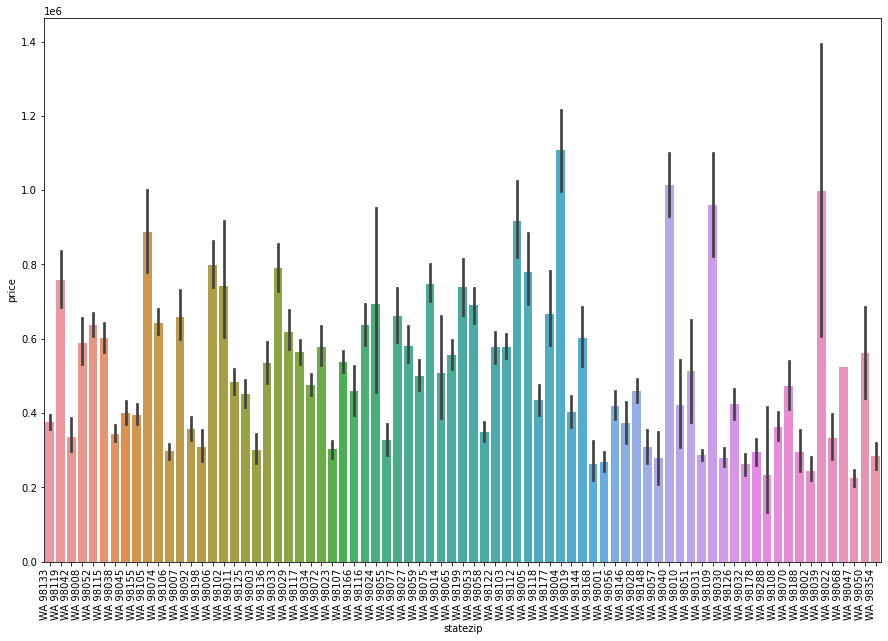

In [72]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="statezip", y="price", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right");

You can observe a litle high variation in statezip in comparison to city. So I'have selected our final column that is statezip.

Now, let's drop street, city and country before moving forward.

In [73]:
df.drop(['street','city','country'],axis=1, inplace=True)

**Encoding**: In laymens language it is just converting data into numerical forms so that our model can understand data easily.

There are many techniques for label encoding but here after observing data well I choose One Hot Encoding.

**Note**: The one hot encoder does not accept 1-dimensional array or a pandas series, the input should always be 2-dimensional and the data passed to the encoder should not contain strings.

In [74]:
df = pd.get_dummies(df, columns=['statezip'], prefix = ['statezip'])

df.head()

,price,bedrooms,bathrooms,sqft_living,floors,view,sqft_basement,statezip_WA 98001,statezip_WA 98002,statezip_WA 98003,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,313000.0,3.0,1.50,1340,1.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,468750.0,5.0,2.50,3650,2.0,4,280,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,342000.0,3.0,2.00,1930,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000,1.0,0,1000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,1940,1.0,0,800,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
df.shape

(4600, 84)

In [76]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view',
       'sqft_basement', 'statezip_WA 98001', 'statezip_WA 98002',
       'statezip_WA 98003', 'statezip_WA 98004', 'statezip_WA 98005',
       'statezip_WA 98006', 'statezip_WA 98007', 'statezip_WA 98008',
       'statezip_WA 98010', 'statezip_WA 98011', 'statezip_WA 98014',
       'statezip_WA 98019', 'statezip_WA 98022', 'statezip_WA 98023',
       'statezip_WA 98024', 'statezip_WA 98027', 'statezip_WA 98028',
       'statezip_WA 98029', 'statezip_WA 98030', 'statezip_WA 98031',
       'statezip_WA 98032', 'statezip_WA 98033', 'statezip_WA 98034',
       'statezip_WA 98038', 'statezip_WA 98039', 'statezip_WA 98040',
       'statezip_WA 98042', 'statezip_WA 98045', 'statezip_WA 98047',
       'statezip_WA 98050', 'statezip_WA 98051', 'statezip_WA 98052',
       'statezip_WA 98053', 'statezip_WA 98055', 'statezip_WA 98056',
       'statezip_WA 98057', 'statezip_WA 98058', 'statezip_WA 98059',
       'statezip_WA 

In [77]:
X1 = df.drop(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view',
       'sqft_basement'],axis = 1)
y = df["price"]

In [78]:
import scipy.stats as stats
for i in X1.columns:
    print(stats.f_oneway(X1[i],y))

F_onewayResult(statistic=14605.260767164393, pvalue=0.0)
F_onewayResult(statistic=14605.261135362472, pvalue=0.0)
F_onewayResult(statistic=14605.260992834186, pvalue=0.0)
F_onewayResult(statistic=14605.260684022885, pvalue=0.0)
F_onewayResult(statistic=14605.261218503998, pvalue=0.0)
F_onewayResult(statistic=14605.260256438021, pvalue=0.0)
F_onewayResult(statistic=14605.261099730416, pvalue=0.0)
F_onewayResult(statistic=14605.260969079478, pvalue=0.0)
F_onewayResult(statistic=14605.261456051168, pvalue=0.0)
F_onewayResult(statistic=14605.261182871922, pvalue=0.0)
F_onewayResult(statistic=14605.261301645505, pvalue=0.0)
F_onewayResult(statistic=14605.26106409833, pvalue=0.0)
F_onewayResult(statistic=14605.261230381362, pvalue=0.0)
F_onewayResult(statistic=14605.260434598382, pvalue=0.0)
F_onewayResult(statistic=14605.261432296464, pvalue=0.0)
F_onewayResult(statistic=14605.260434598382, pvalue=0.0)
F_onewayResult(statistic=14605.260767164398, pvalue=0.0)
F_onewayResult(statistic=14605.2

None of the pvalue is greater than significance value 0.05. So, it proves there is no relationship between the variables with y, so must not be dropped.

Now, we will train our model divide for train, test and validation dataset.

**Training Dataset**: The sample of data used to fit the model.

**Validation Dataset**: The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration.

**Test Dataset**: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

Apply Linear Regression and hence, it's done.

In [79]:
X = df.drop(["price"],axis = 1)
y = df["price"]

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y= train_test_split(X,y, test_size=0.2, random_state=8)

from sklearn.linear_model import LinearRegression
mlrm = LinearRegression()

mlrm.fit(train_X,train_y)

mlrm.score(train_X, train_y)*100

68.77134165450238

In [80]:
X_val, X_test, y_val, y_test = train_test_split(test_X, test_y, test_size=0.1, random_state=42)

In [81]:
mlrm.fit(train_X,train_y)

LinearRegression()

In [82]:
mlrm.score(X_test, y_test)

0.7861935109296652

In [83]:
import statsmodels.api as sm
mod = sm.OLS(train_y, train_X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     97.82
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:10:47   Log-Likelihood:                -49532.
No. Observations:                3680   AIC:                         9.923e+04
Df Residuals:                    3598   BIC:                         9.974e+04
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
bedrooms          -3936.4398   4193.96

We can see the predicted line have almost covered the green line very well. Great!!

Also, score seems quite good!! Almost 80% values are predicted well. So, Congrats to us!!😊👍